In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import bootstrap

In [27]:
losses = np.array([0.489795935,
0.247175147,
0.069209042,
0.58474578,
0.779661034,
0.504237303,
0.461864419,
0.134180794,
0.474576287,
0.545197756,
0.194915259,
0.14548023,
0.043785312,
0.351694925,
0.268361589])

In [28]:
conf = bootstrap([losses], np.mean, n_resamples=9999)

In [29]:
conf

BootstrapResult(confidence_interval=ConfidenceInterval(low=0.2521220693792958, high=0.4629508389121939), standard_error=0.05341022631884629)

In [15]:
arr1 = np.arange(10)
arr2 = np.arange(10) * 2
arr = np.stack((arr1, arr2))
arr.shape

(2, 10)

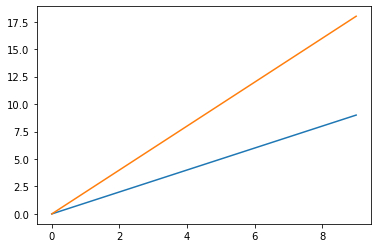

In [17]:
plt.plot(arr.T)

In [20]:
arrl = np.repeat(arr.T, 2, axis=0)

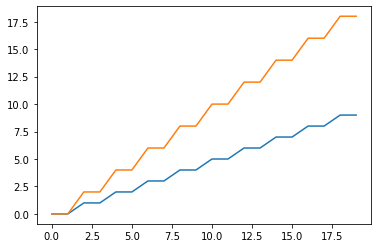

In [21]:
plt.plot(arrl)

In [5]:
ltrial = np.load('/Users/ricsi/Documents/GitHub/MEG-transfer-decoding/scripts/cichy_data/long_trials/trial0l.npy')
trial = np.load('/Users/ricsi/Documents/GitHub/MEG-transfer-decoding/scripts/cichy_data/long_trials/trial0.npy')

(-1.6e-12, 1.4e-12)

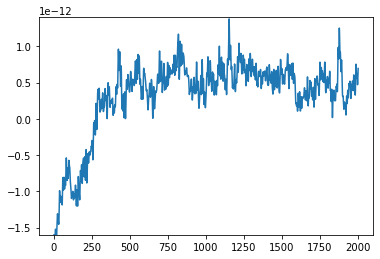

In [10]:
plt.plot(ltrial[:, 0])
plt.ylim([-1.6e-12, 1.4e-12])

(-1000.0, 1150.0)

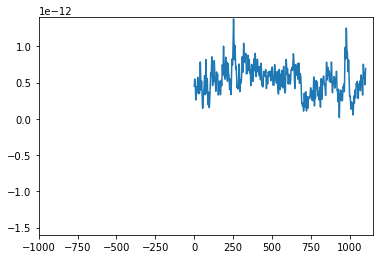

In [13]:
plt.plot(trial[:, 0])
plt.ylim([-1.6e-12, 1.4e-12])
plt.xlim([-1000, 1150])